# Example Notebook for one model

## 1. libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from sam_ml.models import RFC
from sam_ml.data import sample
from sam_ml.models.scorer import s_scoring

## 2. data

### 2.1. load dataset

In [2]:
df = load_iris()
y = pd.Series(df.target)
X = pd.DataFrame(df.data, columns=df.feature_names)
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.80, random_state=42)

### 2.2. upsample data

In [3]:
print("Value counts before upsampling:")
y_train.value_counts()

Value counts before upsampling:


1    41
0    40
2    39
dtype: int64

In [4]:
x_train, y_train = sample(x_train, y_train, type="SMOTE")

In [5]:
print("Value counts after upsampling:")
y_train.value_counts()

Value counts after upsampling:


0    41
1    41
2    41
dtype: int64

## 3. model

The following class methods apply to all models in sam_ml.models. Here as an example the RandomForestClassifier.

### 3.1. simple training

In [6]:
model = RFC()
model.train(x_train, y_train)
model.evaluate(x_test, y_test)

Train score:  1.0  - Train time:  0:00:00
accuracy:  1.0
precision:  [1. 1. 1.]
recall:  [1. 1. 1.]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



{'accuracy': 1.0,
 'precision': array([1., 1., 1.]),
 'recall': array([1., 1., 1.]),
 's_score': 0.9926004570086354,
 'l_score': 1.0}

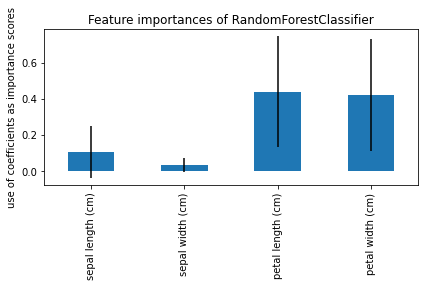

In [7]:
model.feature_importance()

### 3.2. hyperparameter tuning

#### 3.2.1. recall optimization (with recall_score function)

In [8]:
model.hyperparameter_tuning(x_train, y_train, scoring="recall", avg="macro", train_afterwards=True)
model.evaluate(x_test, y_test, avg="macro")


Best: 0.951667 using {'n_estimators': 2, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False}

accuracy:  1.0
precision:  1.0
recall:  1.0
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 's_score': 0.9926004570086354,
 'l_score': 1.0}

#### 3.2.2. recall optimization (with s_scoring function)

In [9]:
scorer = make_scorer(s_scoring, scoring='recall', pos_label=-1, strength=4)
model.hyperparameter_tuning(x_train, y_train, scoring=scorer, train_afterwards=True)
model.evaluate(x_test, y_test, avg="macro")


Best: 0.916447 using {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}

accuracy:  1.0
precision:  1.0
recall:  1.0
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 's_score': 0.9926004570086354,
 'l_score': 1.0}

### 3.3. crossvalidation

#### 3.3.1. small dataset crossvalidation

**Concept:**

The model will be trained on all datapoints except one and then tested on this last one. This will be repeated for all datapoints so that we have our predictions for all datapoints.

**Advantage:** optimal use of information for training

**Disadvantage:** long train time

This concept is very useful for small datasets (datapoints < 150) because the long train time is still not too long and especially with a small amount of information for the model, it is importatnt to use all the information one has for the training.

In [10]:
model.cross_validation_small_data(X, y, upsampling="SMOTE", avg="macro")

RandomForestClassifier: 100%|██████████| 150/150 [00:36<00:00,  4.13it/s]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



{'accuracy': 0.9533333333333334,
 'precision': 0.9534480458850206,
 'recall': 0.9533333333333333,
 's_score': 0.9861117444423929,
 'l_score': 0.9999998737227318,
 'avg train score': 0.9949777777777777,
 'avg train time': '0:00:00'}

#### 3.3.2. multiple split crossvalidation

In [11]:
model.cross_validation(X, y, cv_num=5, avg="macro", console_out=False)

,0,1,2,3,4,average
fit_time,0.283430,0.299103,0.286489,0.285460,0.291005,0.289097
score_time,0.042777,0.040486,0.042887,0.041304,0.034789,0.040449
test_precision (macro),0.969697,0.969697,0.944444,0.969697,1.000000,0.970707
train_precision (macro),1.000000,1.000000,1.000000,0.991870,0.991870,0.996748
test_recall (macro),0.966667,0.966667,0.933333,0.966667,1.000000,0.966667
train_recall (macro),1.000000,1.000000,1.000000,0.991667,0.991667,0.996667
test_accuracy,0.966667,0.966667,0.933333,0.966667,1.000000,0.966667
train_accuracy,1.000000,1.000000,1.000000,0.991667,0.991667,0.996667
test_s_score,0.987355,0.987355,0.972870,0.987355,0.992600,0.985507
train_s_score,0.992600,0.992600,0.992600,0.991755,0.991755,0.992262
